# 근로소득에 따른 의료 접근성 - 한국과 핀란드를 중심으로

## 데이터 정보
ISSP 2011 : Health
한국 : 한국종합사회조사(KGSS) 누적데이터    
핀란드 : Finnish Social Science Data Archive

누적데이터는 기존 공개된 연도별 데이터 중 오류를 수정한 내용을 포함하고 있습니다. 또한, 모든 연도에 적용할 가중치 변수가 포함되어 있습니다. 누적데이터 이용을 추천합니다.

## 패키지 설치

In [1]:
install.packages("foreign")
library(foreign)

Warning message:
"unable to access index for repository http://www.stats.ox.ac.uk/pub/RWin/bin/windows/contrib/3.5:
  URL 'http://www.stats.ox.ac.uk/pub/RWin/bin/windows/contrib/3.5/PACKAGES'를 열 수 없습니다"

package 'foreign' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\eunee\AppData\Local\Temp\Rtmp2RlVQ7\downloaded_packages


## 파일 불러오기

In [2]:
kordata <- read.spss("C:/Users/eunee/khu_project_2019/data/kor.sav", reencode = 'utf-8', use.value.labels = FALSE, to.data.frame = TRUE)
findata <- read.spss("C:/Users/eunee/khu_project_2019/data/fin.por", use.value.labels = FALSE, to.data.frame = TRUE)

Warning message in read.spss("C:/Users/eunee/khu_project_2019/data/kor.sav", reencode = "utf-8", :
"C:/Users/eunee/khu_project_2019/data/kor.sav: Very long string record(s) found (record type 7, subtype 14), each will be imported in consecutive separate variables"Warning message in read.spss("C:/Users/eunee/khu_project_2019/data/kor.sav", reencode = "utf-8", :
"C:/Users/eunee/khu_project_2019/data/kor.sav: Long string value labels record found (record type 7, subtype 21), but ignored"re-encoding from utf-8


한글 인코딩을 위해 ```reencode = 'utf-8'``` 코드를 추가

## 한국 데이터 클리닝

KGSS 누적 데이터를 다운받아 그중 2011년 자료를 ```subset```해서 사용한다.

In [3]:
kor_2011 <- subset(kordata, YEAR == 2011)

필요한 변수를 ```subset```한다.

In [4]:
kor <- subset(kor_2011, select = c("SEX", "AGE", "MARITAL", "RINCOME", "RXTINCM", "TRTWHY1", "TRTWHY2", "TRTWHY3", "TRTWHY4"))

동거에 ```1```, 비동거에 ```2```, 미혼에 ```3```의 새로운 값을 부여한다. 
- 동거 : 기혼, 동거    
- 비동거 : 사별, 이혼 별거    
- 미혼

In [5]:
kor$martial <- ifelse(kor$MARITAL == 6, 1, kor$MARITAL)
kor$martial <- ifelse(kor$martial == 3, 2, kor$martial)
kor$martial <- ifelse(kor$martial == 4, 2, kor$martial)
kor$martial <- ifelse(kor$martial == 5, 3, kor$martial)

분석에 사용한 변수들만 ```subset```하고, 이름을 다시 붙여준다.

In [6]:
kor <- subset(kor, select= c("SEX", "AGE", "martial", "RINCOME", "RXTINCM", "TRTWHY1", "TRTWHY2", "TRTWHY3", "TRTWHY4"))

In [7]:
names(kor)[3] <- "MARTIAL"

응답에서 '모르겠다/무응답', '비해당'을 ```ifelse```문을 이용해 ```NA```처리한다.

In [8]:
kor$RINCOME <- ifelse(kor$RINCOME==-8, NA, kor$RINCOME)
kor$RINCOME <- ifelse(kor$RINCOME==-1, NA, kor$RINCOME)

kor$RXTINCM <- ifelse(kor$RXTINCM==-8, NA, kor$RXTINCM)
kor$RXTINCM <- ifelse(kor$RXTINCM==-1, NA, kor$RXTINCM)

kor$TRTWHY1 <- ifelse(kor$TRTWHY1==-1, NA, kor$TRTWHY1)
kor$TRTWHY2 <- ifelse(kor$TRTWHY2==-1, NA, kor$TRTWHY2)
kor$TRTWHY3 <- ifelse(kor$TRTWHY3==-1, NA, kor$TRTWHY3)
kor$TRTWHY4 <- ifelse(kor$TRTWHY4==-1, NA, kor$TRTWHY4)

이제 ```kor```에 있는 ```NA```를 제거한다.

In [9]:
kor <- kor[complete.cases(kor), ]

변수들을 범주화한다.

In [10]:
kor$SEX <- factor(kor$SEX)
kor$MARTIAL <- factor(kor$MARTIAL)
kor$TRTWHY1 <- factor(kor$TRTWHY1)
kor$TRTWHY2 <- factor(kor$TRTWHY2)
kor$TRTWHY3 <- factor(kor$TRTWHY3)
kor$TRTWHY4 <- factor(kor$TRTWHY4)

In [11]:
summary(kor)

 SEX          AGE        MARTIAL    RINCOME          RXTINCM        TRTWHY1
 1:369   Min.   :19.00   1:515   Min.   : 0.000   Min.   : 0.0000   1: 22  
 2:302   1st Qu.:36.00   2: 60   1st Qu.: 3.000   1st Qu.: 0.0000   2:649  
         Median :44.00   3: 96   Median : 5.000   Median : 0.0000          
         Mean   :45.09           Mean   : 5.985   Mean   : 0.4054          
         3rd Qu.:52.50           3rd Qu.: 7.000   3rd Qu.: 0.0000          
         Max.   :81.00           Max.   :21.000   Max.   :11.0000          
 TRTWHY2 TRTWHY3 TRTWHY4
 1:202   1: 52   1: 81  
 2:469   2:619   2:590  
                        
                        
                        
                        

## ```kor```

- ```SEX``` : 성별
    - ```1``` : 남자
    - ```2``` : 여자

    
- ```AGE``` : 연령(만 나이)


- ```MARITAL``` : 동거
    - ```1``` : 동거
    - ```2``` : 비동거
    - ```3``` : 미혼
    
    
- ```RINCOME``` : 월 평균 근로소득 (세전)
    - ```0``` : 소득 없음
    - ```1``` : 50만원 미만
    - ```2``` : 50만원 ~ 99만원
    - ```3``` : 100만원 ~ 149만원
    - ```4``` : 150만원 ~ 199만원
    - ```5``` : 200만원 ~ 249만원
    - ```6``` : 250만원 ~ 299만원
    - ```7``` : 300만원 ~ 349만원
    - ```8``` : 350만원 ~ 399만원
    - ```9``` : 400만원 ~ 449만원
    - ```10``` : 450만원 ~ 499만원
    - ```11``` : 500만원 이상

    
    
- ```RXTINCM``` : 월 평균 근로외 소득 (세전)
    - ```0``` : 소득 없음
    - ```1``` : 50만원 미만
    - ```2``` : 50만원 ~ 99만원
    - ```3``` : 100만원 ~ 149만원
    - ```4``` : 150만원 ~ 199만원
    - ```5``` : 200만원 ~ 249만원
    - ```6``` : 250만원 ~ 299만원
    - ```7``` : 300만원 ~ 349만원
    - ```8``` : 350만원 ~ 399만원
    - ```9``` : 400만원 ~ 449만원
    - ```10``` : 450만원 ~ 499만원
    - ```11``` : 500만원 이상

    
    
- 치료 못 받았던 경험  
    ```TRTWHY1``` : 비용을 지불할 능력이 없어서
    - ```1``` : 있었다
    - ```2``` : 없었다
    
 ```TRTWHY2``` : 직장을 빠지고 갈 시간이 없거나 다른 일로 바빠서  
    - ```1``` : 있었다
    - ```2``` : 없었다

 ```TRTWHY3``` : 거주하는 동네나 인근에서는 필요한 치료를 받을 수 없어서   
    - ```1``` : 있었다
    - ```2``` : 없었다
  
 ```TRTWHY4``` : 치료를 기다리는 사람들이 너무 많아서   
    - ```1``` : 있었다
    - ```2``` : 없었다

## 핀란드 데이터 클리닝

필요한 데이터를 ```subset```한다.

In [12]:
fin <- subset(findata, select = c("K1", "K2", "K13", "K59", "K38A", "K38B", "K38C", "K38D"))

한국의 경우 연령 정보가 나이로 되어 있는 반면, 핀란드의 데이터에서는 태어난 연도로 되어 있다. 이를 모두 연령 단위로 통일해 ```age``` 변수로 만든다.

In [13]:
fin$age <- 2011-fin$K2

'비해당' 응답은 ```NA```로 처리한다.

In [14]:
fin$k38a <- ifelse(fin$K38A == 8, NA, fin$K38A)
fin$k38b <- ifelse(fin$K38B == 8, NA, fin$K38B)
fin$k38c <- ifelse(fin$K38C == 8, NA, fin$K38C)
fin$k38d <- ifelse(fin$K38D == 8, NA, fin$K38D)

In [15]:
fin <- subset(fin, select = c("K1", "age", "K13", "K59", "k38a", "k38b", "k38c", "k38d"))

In [16]:
names(fin) <- c("SEX", "AGE", "MARTIAL", "INCOME", "TRTWHY1", "TRTWHY2", "TRTWHY3", "TRTWHY4")

```NA```를 제거한다.

In [17]:
fin <- fin[complete.cases(fin), ]

변수들을 범주화한다.

In [18]:
fin$SEX <- factor(fin$SEX)
fin$MARTIAL <- factor(fin$MARTIAL)
fin$TRTWHY1 <- factor(fin$TRTWHY1)
fin$TRTWHY2 <- factor(fin$TRTWHY2)
fin$TRTWHY3 <- factor(fin$TRTWHY3)
fin$TRTWHY4 <- factor(fin$TRTWHY4)

In [19]:
summary(fin)

 SEX          AGE        MARTIAL     INCOME       TRTWHY1 TRTWHY2 TRTWHY3
 1:245   Min.   :15.00   1:456   Min.   :    10   1: 51   1: 38   1: 40  
 2:280   1st Qu.:35.00   2: 13   1st Qu.:  3000   2:474   2:487   2:485  
         Median :48.00   3: 56   Median :  4500                          
         Mean   :46.73           Mean   :  5902                          
         3rd Qu.:60.00           3rd Qu.:  6000                          
         Max.   :75.00           Max.   :125000                          
 TRTWHY4
 1: 78  
 2:447  
        
        
        
        

히스토그램을 이용해 임금의 분포를 살펴보자.

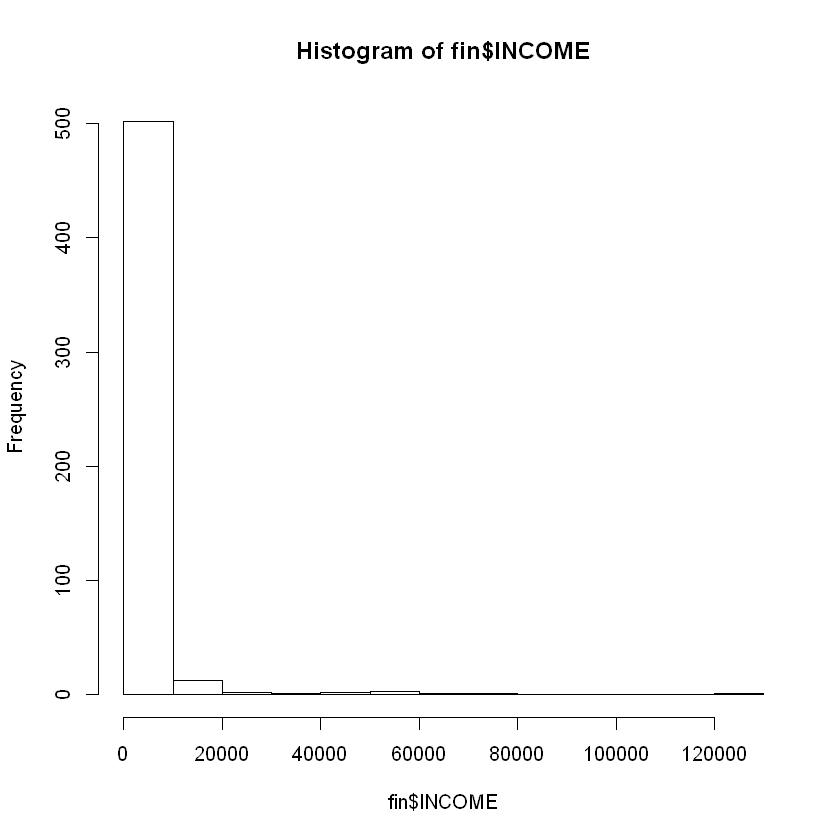

In [20]:
hist(fin$INCOME)

임금 변수의 왜도가 심하므로 올바른 분석을 하기 어렵다. 따라서 로그를 취해 왜도를 줄인다.

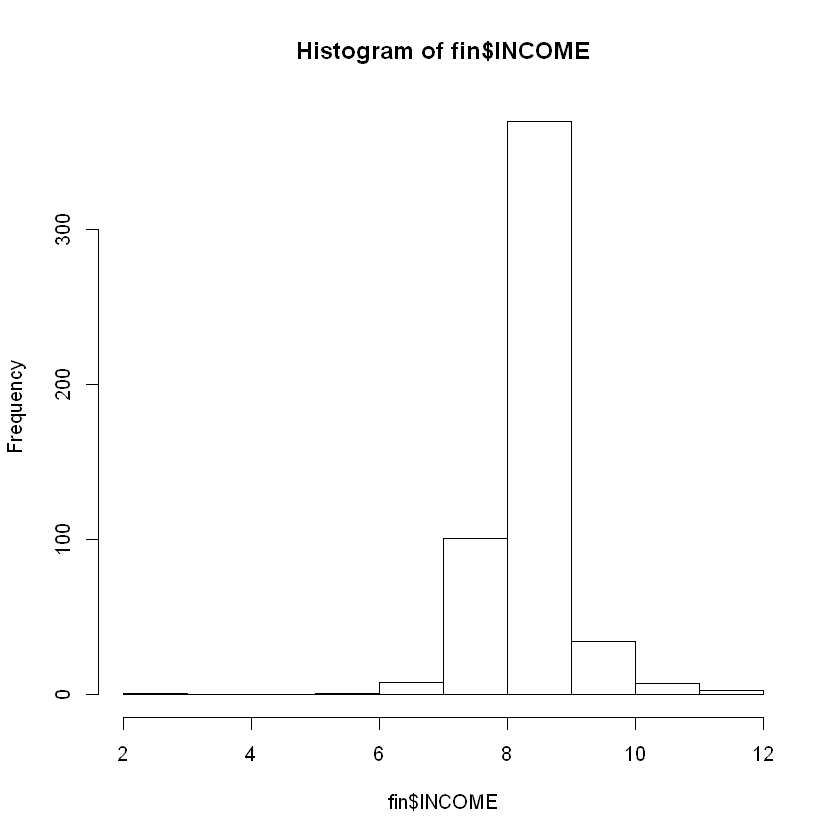

In [21]:
fin$INCOME <- log(fin$INCOME)
hist(fin$INCOME)

In [22]:
summary(fin)

 SEX          AGE        MARTIAL     INCOME       TRTWHY1 TRTWHY2 TRTWHY3
 1:245   Min.   :15.00   1:456   Min.   : 2.303   1: 51   1: 38   1: 40  
 2:280   1st Qu.:35.00   2: 13   1st Qu.: 8.006   2:474   2:487   2:485  
         Median :48.00   3: 56   Median : 8.412                          
         Mean   :46.73           Mean   : 8.386                          
         3rd Qu.:60.00           3rd Qu.: 8.700                          
         Max.   :75.00           Max.   :11.736                          
 TRTWHY4
 1: 78  
 2:447  
        
        
        
        

- ```SEX``` : 성별
    - ```1``` : 남자
    - ```2``` : 여자

    
- ```AGE``` : 출생년도


- ```MARTIAL``` : 동거
    - ```1``` : 동거
    - ```2``` : 비동거
    - ```3``` : 해당 없음(미혼)
    
    
- ```INCOME``` : 로그를 취한 월 평균 총 소득 (세전, 근로외 소득 포함)
    
    
- 치료 못 받았던 경험  
    ```TRTWHY1``` : 비용을 지불할 능력이 없어서
    - ```1``` : 있었다
    - ```2``` : 없었다
    
 ```TRTWHY2``` : 직장을 빠지고 갈 시간이 없거나 다른 일로 바빠서  
    - ```1``` : 있었다
    - ```2``` : 없었다

 ```TRTWHY3``` : 거주하는 동네나 인근에서는 필요한 치료를 받을 수 없어서   
    - ```1``` : 있었다
    - ```2``` : 없었다
  
 ```TRTWHY4``` : 치료를 기다리는 사람들이 너무 많아서   
    - ```1``` : 있었다
    - ```2``` : 없었다

## 작업 공간 저장

In [23]:
save.image(file = "C:/Users/eunee/khu_project_2019/data_cleaning.RData")